# Exercise - Create a Router with LangGraph - STARTER

In this exercise, you will build a router using LangGraph to dynamically control the flow of your application.

**Challenge**

You're building a text processing application that can:

- Reverse a string (e.g., "hello" → "olleh")
- Convert a string to uppercase (e.g., "hello" → "HELLO")

Your application should:

- Accept user input and an action type.
- Route to the appropriate node (reverse or upper) based on the action.
- Handle invalid actions gracefully.

This will be achieved by routing the input through LangGraph nodes using a conditional edge.

## 0. Import the necessary libs

In [1]:
from typing import TypedDict, Literal
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
llm_base_url = "https://openai.vocareum.com/v1"

## 1. State Schema

We’ll use Python’s TypedDict to define the structure of our state:

- input: The user’s input string.
- action: The action to be performed (reverse or upper).
- output: The processed output.

Then initialize the State Graph with the state schema you have created

In [2]:
# TODO - Create the State Schema class
class State(TypedDict):
    input: str
    action: Literal["reverse", "upper"]
    output: str

In [3]:
workflow = StateGraph(State)

## 2. Nodes

Create the logics in your nodes.
- Node A should reverse the input
- Node B should convert input to uppercase

Then add the nodes to the workflow.

In [4]:
def node_a(state: State):
    print("Node A\n")

    # TODO - Reverse
    output = state['input'][::-1]
    
    print(f"output: {output}")
    return {"output": output}

In [5]:
def node_b(state: State):
    print("Node B\n")

    # TODO - Uppercase
    output = state['input'].upper()
    
    print(f"output: {output}")
    return {"output": output}

In [6]:
# TODO- Add node A to the workflow
workflow.add_node(node_a)

In [7]:
# TODO - Add node B to the workflow
workflow.add_node(node_b)

## 3. Routing Function

Create a routing function to determine which node to execute based on the action. If action is reverse, it should return node A, if action is upper, node B.


In [8]:
# TODO - The routing function
def routing_function(state: State):
    if state['action'] == "reverse":
        return "node_a"
    elif state['action'] == "upper":
        return "node_b"
    else:
        raise ValueError('Value should be either "reverse" or "upper".')

## 4. Edges

Use conditional edges to control the flow of data:

- START → routing_function to decide the path.
- node_a → END for reverse.
- node_b → END for uppercase.

In add_conditional_edges() method, use source, path and path_map as the necessary arguments for routing.

In [9]:
# TODO - Add your condital edges
workflow.add_conditional_edges(
    source=START, 
    path=routing_function, 
    path_map=["node_a", "node_b"]
)

In [10]:
workflow.add_edge("node_a", END)
workflow.add_edge("node_b", END)

## 5. Compile and Run

Compile the graph, display and run it with different actions.

In [11]:
graph = workflow.compile()

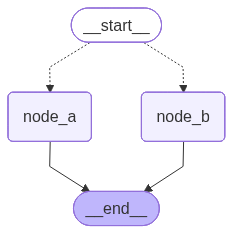

In [12]:
display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [13]:
# TODO - Input upper action
graph.invoke(
    input = {"input": "How are you?", "action": "upper"}, 
)

Node B

output: HOW ARE YOU?


{'input': 'How are you?', 'action': 'upper', 'output': 'HOW ARE YOU?'}

In [14]:
# TODO - Input reverse action
graph.invoke(
    input = {"input": "How are you?", "action": "reverse"}, 
)

Node A

output: ?uoy era woH


{'input': 'How are you?', 'action': 'reverse', 'output': '?uoy era woH'}

## 6. Experiment

Now that you understood how it works, experiment with new things.
- Test different scenarios, like passing "lower" as the actions
- Make it more robust when this case happen
- Add more actions